In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
import seaborn as sns
import torch 
import joblib

In [31]:
housing_price_df = pd.read_csv("../../datasets/Housing.csv")
housing_price_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [32]:
housing_price_df_int = housing_price_df[["price", "area","bedrooms", "bathrooms","stories", "parking"]]
housing_price_df_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      545 non-null    int64
 1   area       545 non-null    int64
 2   bedrooms   545 non-null    int64
 3   bathrooms  545 non-null    int64
 4   stories    545 non-null    int64
 5   parking    545 non-null    int64
dtypes: int64(6)
memory usage: 25.7 KB


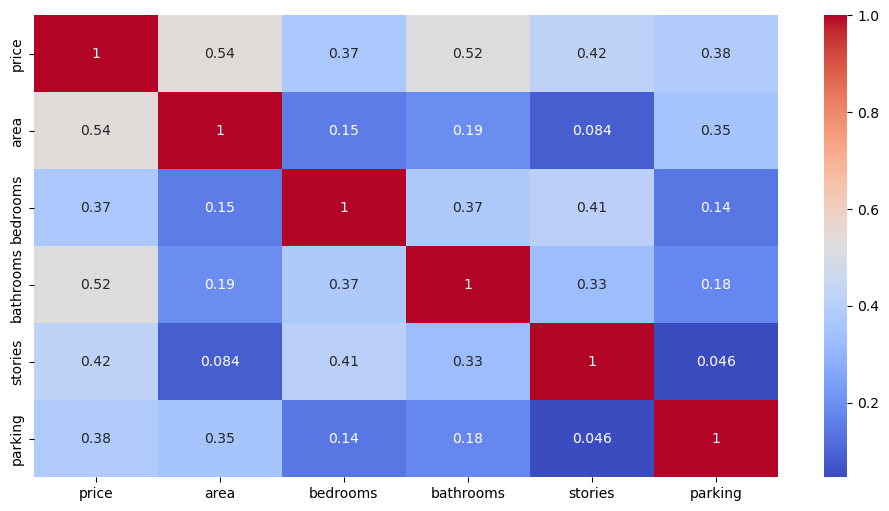

In [33]:
plt.figure(figsize=(12, 6)) #Create canvas
sns.heatmap(housing_price_df_int.corr(), annot= True, cmap="coolwarm") # annot(True) hiddend number   cmap is bang mau
plt.show() 

In [34]:
X = housing_price_df_int[["area","bedrooms", "bathrooms","stories", "parking"]]
y = housing_price_df_int["price"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42) 

In [36]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression()) #degree (hyperparameter)
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
y_pred

array([ 6505190.04845729,  6264935.34562231,  3379732.2803393 ,
        4313632.08041256,  3609277.61697386,  4685697.11690369,
        5823994.67396095,  5292998.03246973,  3206392.32716105,
        2914176.45064711,  9825037.65214101,  3332212.53452809,
        3233522.58499827,  3511081.06973112,  3914600.77405751,
        5866143.0352296 ,  3050839.03276682,  5184429.86146654,
        5139062.53222197,  4095558.06638212,  5862354.49302736,
        4714550.46370553,  3199965.92628386,  4337676.94862579,
        5470818.01224392,  7523437.18355385,  2921604.13150263,
        4194563.1263358 ,  5572998.3231037 ,  3547371.06536083,
        4788112.88731368,  3997198.10302717,  6114431.17169985,
        4767516.27136321,  4175903.47249551,  5597265.03207323,
        4784476.29732913,  3412292.2230432 ,  3359533.31727528,
        3942932.96534809,  5706450.78190806,  3190917.20931516,
        6242205.87026028,  4520586.14794999,  4287735.91476621,
        4351331.96266086,  6858617.26473

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mse) 
r2 = r2_score(y_test, y_pred) #r2 = accuracy model (*) => Linear best

In [38]:
print(f"MAE: {mae}")

MAE: 1111158.8114950287


In [39]:
print(f"MSE: {mse}")

MSE: 2326140712528.3135


In [40]:
print(f"Model Accuracy: {r2}")  # ~99%

Model Accuracy: 0.5397945623164335


In [41]:
def predict_price(area_m2):
    X_new = pd.DataFrame({"area": [area_m2]}) # fit col[area] 
    return pipe.predict(X_new) # print array, had [0] or item()
print(predict_price(50))


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- bathrooms
- bedrooms
- parking
- stories


Accuracy: 1.0
ROC-AUC : 1.0
              precision    recall  f1-score   support

           0      1.000     1.000     1.000         3
           1      1.000     1.000     1.000         2

    accuracy                          1.000         5
   macro avg      1.000     1.000     1.000         5
weighted avg      1.000     1.000     1.000         5

P(expensive=1 | 185 m²): 0.05623369118734913


c:\Users\luong\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
